# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nicholas Ali
- **Email:** nicholasali.888@gmail.com
- **ID Dicoding:** nicholas_ali

## Menentukan Pertanyaan Bisnis

- Bagaimana pola rental? apakah ada pola sibuk yang konsisten?
- Apakah cuaca ekstrem berdampak signifikan terhadap penurunan jumlah rental?

## Import Semua Packages/Library yang Digunakan

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [108]:
# Load dataset day.csv
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [109]:
# Load dataset hour.csv
hour_df = pd.read_csv("data/hour.csv")
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- dataset day.csv berisikan informasi rental bike dalam rentang waktu harian
- dataset hour.csv berisikan informasi rental bike dalam rentang waktu per jam
- Struktur kolom kedua dataset sepertinya relatif konsisten
- Berdasarkan readme pada dataset, 'hour.csv' adalah versi granular dari 'day.csv'. Saya akan pakai 'hour.csv' saja.
- Berdasarkan readme dataset menyimpan record dalam rentang waktu 2 tahun (2011-2012)

### Assessing Data

In [110]:
# Cek struktur dan tipe data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Semua kolom di semua dataset memiliki tipe data quantitative kecuali kolom 'dteday'
- kolom dteday bisa di ubah ke format datetime untuk analisis waktu
- Semua kolom pada semua dataset tidak ada yang memiliki missing values

In [111]:
# Cek descriptive statistic
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Beberapa fields punya nama yang kurang intuitive, harus melakukan rename

### Cleaning Data

In [112]:
# ganti nama fields agar lebih readable dan intuitive
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'date',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_rent_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

hour_df.head()

,rec_id,date,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_rent_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- nama kolom semakin mudah dibaca, tetapi valuenya tidak.

In [113]:
# Mapping nilai kolom kategorikal dengan value yang deskriptif
list_season = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

list_month = {
    1: 'January',  2: 'February', 3: 'March',
    4: 'April',    5: 'May',      6: 'June',
    7: 'July',     8: 'August',   9: 'September',
    10: 'October', 11: 'November',12: 'December'
}

list_year = {
    0: '2011',
    1: '2012'
}

list_day = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

list_weather = {
    1: 'Clear',
    2: 'Mist + Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}

list_option = {
    0: 'No',
    1: 'Yes'
}



# Apply mapping
hour_df['season'] = hour_df['season'].map(list_season)
hour_df['month'] = hour_df['month'].map(list_month)
hour_df['year'] = hour_df['year'].map(list_year)
hour_df['weekday'] = hour_df['weekday'].map(list_day)
hour_df['weather_condition'] = hour_df['weather_condition'].map(list_weather)
hour_df['is_holiday'] = hour_df['is_holiday'].map(list_option)
hour_df['is_workingday'] = hour_df['is_workingday'].map(list_option)
hour_df['date'] = pd.to_datetime(hour_df['date']) # sekalian konversi date ke format datetime

**Insight:**
- sekilas mapping terlihat berhasil, tetapi harus validasi lebih dalam lagi

In [114]:
# Validasi mapping dan cek apakah ada missing value karena ke gagalan mapping

# cek apakah ada missing value
hour_df.info()
hour_df.isna().sum()

# cek apakah jumlah category nya cocok
hour_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             17379 non-null  int64         
 1   date               17379 non-null  datetime64[ns]
 2   season             17379 non-null  object        
 3   year               17379 non-null  object        
 4   month              17379 non-null  object        
 5   hour               17379 non-null  int64         
 6   is_holiday         17379 non-null  object        
 7   weekday            17379 non-null  object        
 8   is_workingday      17379 non-null  object        
 9   weather_condition  17379 non-null  object        
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

,rec_id,date,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_rent_count
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,July,NaN,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- mapping berhasil tidak ada missing value
- jumlah kategori pada tiap tiap kolom cocok

In [115]:
# ubah kolom 'hour' ke format yang lebih informatif
hour_df['hour'] = hour_df['hour'].apply(lambda x: f"{x:02d}:00")
hour_df['hour']

0        00:00
1        01:00
2        02:00
3        03:00
4        04:00
         ...  
17374    19:00
17375    20:00
17376    21:00
17377    22:00
17378    23:00
Name: hour, Length: 17379, dtype: object

**Insight:**
- kolom 'hour' lebih enak dibaca dan cocok untuk visualisasi

## Exploratory Data Analysis (EDA)

### Explore pola rata-rata jumlah rental (total_rent_count) berdasarkan jam dalam sehari

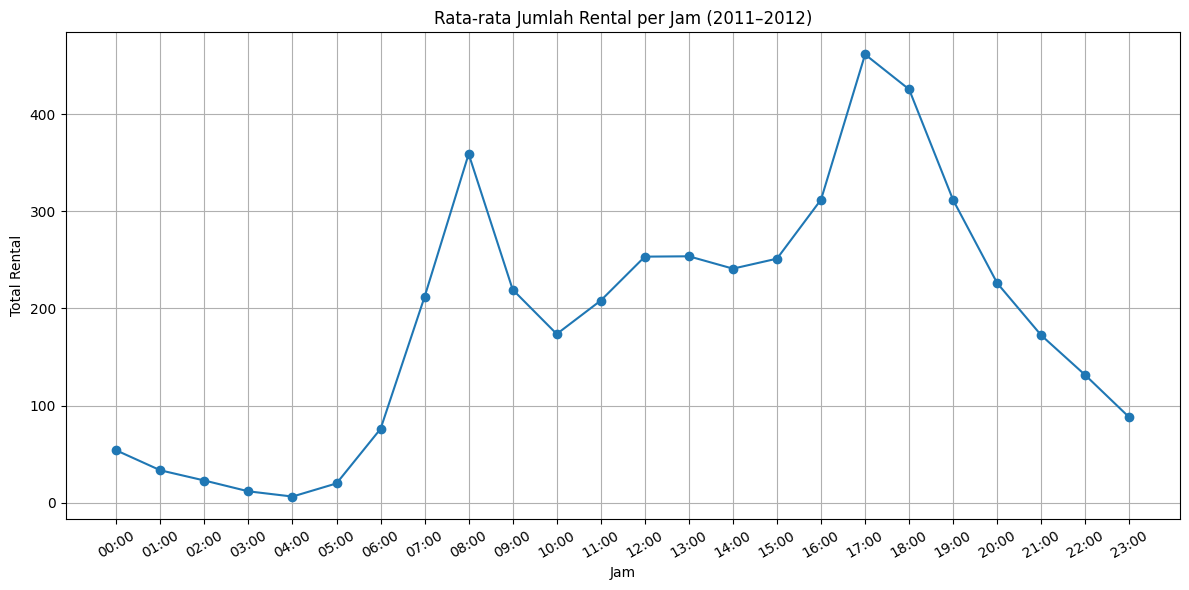

In [116]:
# Melihat rata-rata jumlah rental per jam
avg_rental_by_hour = hour_df.groupby('hour')['total_rent_count'].mean().sort_index() 
hour = [f"{h:02d}:00" for h in range(24)]

plt.figure(figsize=(12,6))
avg_rental_by_hour.plot(kind='line', marker='o')
plt.title('Rata-rata Jumlah Rental per Jam (2011–2012)')
plt.xlabel('Jam')
plt.ylabel('Total Rental')
plt.grid(True)
plt.xticks(ticks=range(24), labels=hour, rotation=45)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

**Insight:**
- Dari grafik diatas cukup jelas ada 2 peak hours: sekitar *pukul 8 pagi* dan *5-6 sore*
- Jumlah rental relatif rendah saat tengah malam higga subuh

### Explore Perbandingan Hari Kerja vs Hari Libur

<Figure size 1400x600 with 0 Axes>

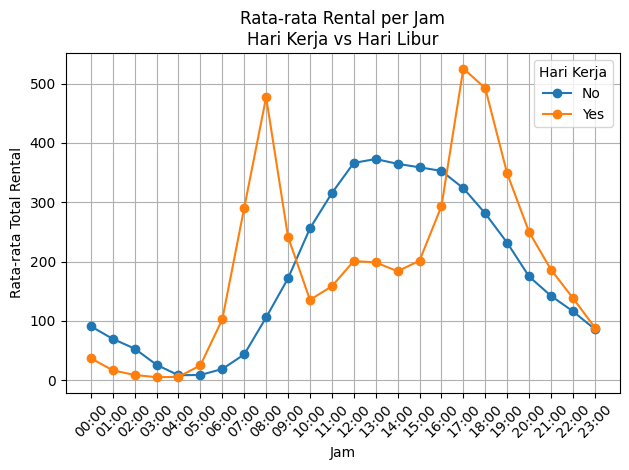

In [117]:
# Sekarang melihat berdasarkan hari kerja vs. bukan hari kerja
avg_hour_by_working = (
    hour_df.groupby(['hour', 'is_workingday'])['total_rent_count']
    .mean()
    .unstack()
    .sort_index()
)

# Plot
plt.figure(figsize=(14,6))
avg_hour_by_working.plot(kind='line', marker='o')
plt.title('Rata-rata Rental per Jam\nHari Kerja vs Hari Libur')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Total Rental')
plt.grid(True)
plt.xticks(ticks=range(24), labels=[f"{h:02d}:00" for h in range(24)], rotation=45)
plt.legend(title='Hari Kerja')
plt.tight_layout()
plt.show()

**Insight:**
- Hari kerja tinggi di jam-jam commuting
- Hari libur tinggi di siang hari dan grafiknya lebih merata (12:00-15:00)

### Explore jumlah rental berubah tergantung pada kategori cuaca (weather_condition)

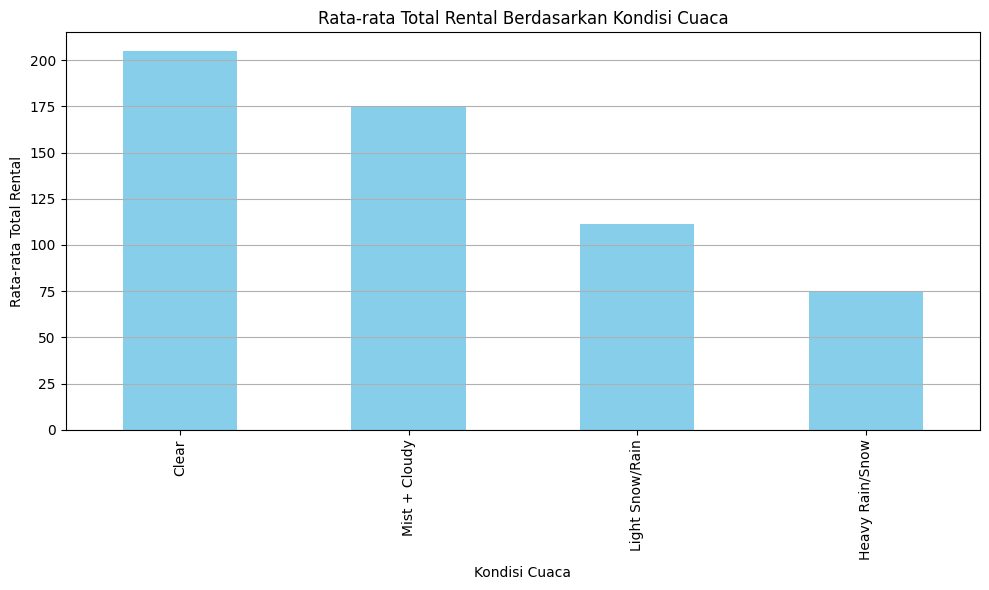

In [118]:
hour_df['weather_condition'].value_counts()
# Hitung rata-rata total rental per kategori cuaca
avg_rental_by_weather = hour_df.groupby('weather_condition')['total_rent_count'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_rental_by_weather.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Total Rental Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Total Rental')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Insight:**
- cuaca cerah(clear), jumlah rental tertinggi
- terjadi penurunan yang signifikan saat hujan salju

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola rental? apakah ada pola sibuk yang konsisten?

<Figure size 1400x600 with 0 Axes>

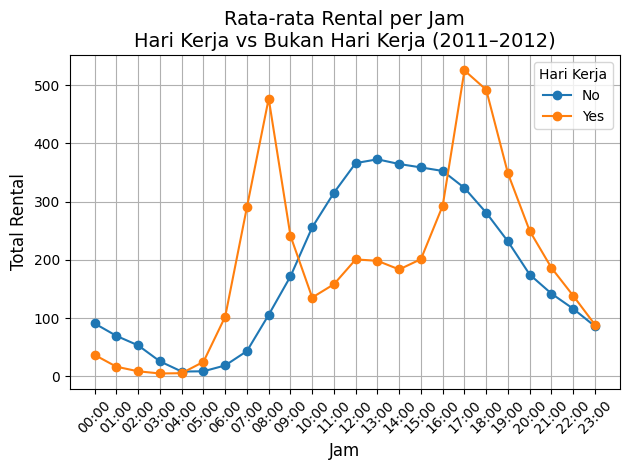

In [119]:
plt.figure(figsize=(14,6))
avg_hour_by_working.plot(kind='line', marker='o')
plt.title('Rata-rata Rental per Jam\nHari Kerja vs Bukan Hari Kerja (2011–2012)', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Total Rental', fontsize=12)
plt.grid(True)
plt.xticks(ticks=range(24), labels=[f"{h:02d}:00" for h in range(24)], rotation=45)
plt.legend(title='Hari Kerja')
plt.tight_layout()
plt.show()

**Insight:**
- Puncak jam di hari kerja yaitu saat commute time
- Puncak jam di hari libur cendering ada di tengah hari
- Jumlah rental saat hari libur tidak setinggi di hari Kerja

### Pertanyaan 2: Apakah cuaca ekstrem berdampak signifikan terhadap penurunan jumlah rental?

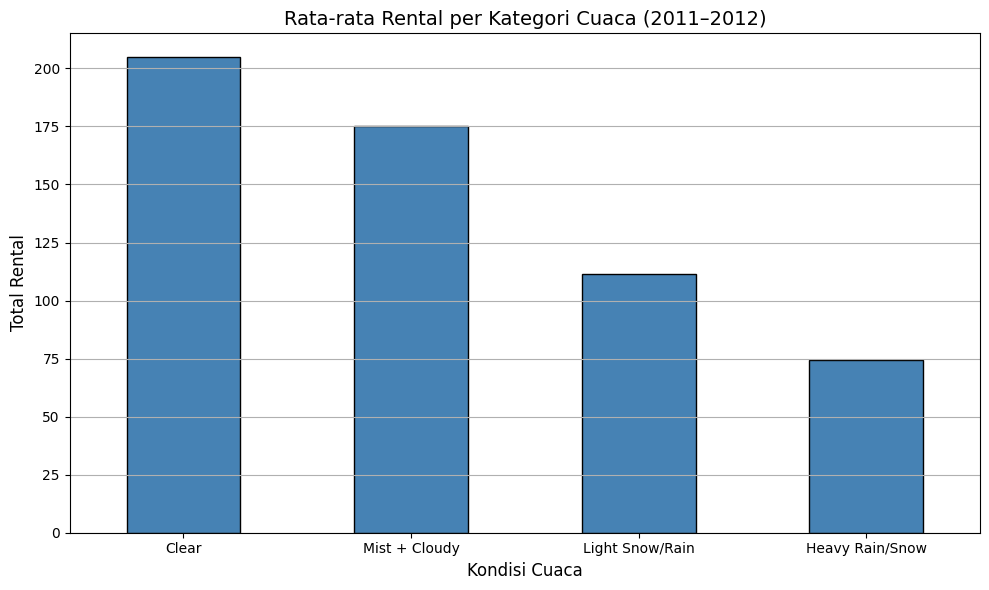

In [120]:
plt.figure(figsize=(10,6))
avg_rental_by_weather.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Rata-rata Rental per Kategori Cuaca (2011–2012)', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Total Rental', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Insight:**
- jumlah rental sangat bergantung pada kondisi cuaca
- jumlah rental menurun secara drastis di cuaca ekstrem

## Analisis Lanjutan (Opsional)

### Analisasi RFM untuk Bike Sharing Dataset (Berbasis kolom 'casual' & 'registered')

In [ ]:
# membuat rmf_df dengan pivot table
rfm_df = hour_df.groupby(['date'])[['casual', 'registered']].sum().reset_index()

# RFM analisis untuk penyewa casual
casual_last_date = rfm_df[rfm_df['casual'] > 0]['date'].max()
casual_recency = (hour_df['date'].max() - casual_last_date).days
casual_frequency = rfm_df[rfm_df['casual'] > 0].shape[0]
casual_monetary = hour_df['casual'].sum()

# RFM untuk untuk member (registered)
registered_last_date = rfm_df[rfm_df['registered'] > 0]['date'].max()
registered_recency = (hour_df['date'].max() - registered_last_date).days
registered_frequency = rfm_df[rfm_df['registered'] > 0].shape[0]
registered_monetary = hour_df['registered'].sum()

# hasil akhir dari RFM analisis
rfm_result_df = pd.DataFrame({
    'User Type': ['Casual', 'Registered'],
    
    
    
    
    
    
    
    
    
    
    
    
    
    'Recency (days)': [casual_recency, registered_recency],
    'Frequency (days active)': [casual_frequency, registered_frequency],
    'Monetary (total rental)': [casual_monetary, registered_monetary]
})

rfm_result_df

,User Type,Recency (days),Frequency (days active),Monetary (total rental)
0,Casual,0,731,620017
1,Registered,0,731,2672662


**Insight:**
- Jenis user *registered* dan *casual* memliki frequency yang sama (days active) tetapi total rental *registered* jauh lebih tinggi
- Semia jenis user masih tercatat aktif hingga akhir periode dataset (recency = 0)
- Perbedaan total rental yang sangat significant 2,6 juta dibanding 62 ribu mendukung bahwa user *registered* sangat loyal dan aktif
- Kemungkinan besar user *casual* hanyak menggunakan sepeda untuk kebutuhan tertentu atau pada saat rekreasi

### Download csv hasil olahan untuk dashboard

In [122]:
hour_df.to_csv('dashboard/main_data.csv', index=False) 

## Conclusion

##### Conclution pertanyaan 1
Kita dapat melihat pola jam sibuk yang sangat konsisten, terutama pada hari kerja, ini penting agar:
- Meningkatkan kesediaan yang lebih banyak di jam jam sibuk (08:00 & 16:00 - 17:00)
- Dapat menyusun strategi distribusi yang lebih baik dengan membedakan hari kerja dan hari lbiur
- Mengoptimalkan resource secara efisien berdasarkan waktu dan hari

##### Conclution pertanyaan 2
Cuaca ekstrem sangat terlihat jelas dapat mengurangi aktivitas rental. Oleh karena itu, layanan bike sharing perlu:
- Melakukan penyesuaian pada jam operasional dan jumlah bike aktif berdasarkan prediksi cuaca
- Memberikan peringatan atau informasi cuaca ke pengguna via aplikasi
- Mengoptimalkan distribusi resource di cuaca-cuaca tertentu